In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [3]:
#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#sys.path.append(lib_path)

#import ReadOutTools_MITgcm as rout 

lib_path = os.path.abspath('/Users/anakarinarm/SubmarineCanyonsResearch/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [4]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [5]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/Volumes/MOBY/NOGMREDI/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/Volumes/MOBY/NOGMREDI/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer='/Volumes/MOBY/NOGMREDI/run03/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)


In [10]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

z = CanyonStateOut.variables['Z']



In [8]:
Tr1 = rout.getField(Ptracer,'Tr1') # 


In [11]:
ConcInd = np.argmax(Tr1[5,:,:,:]>=7.4,axis=0)
ConcDepths = np.empty((360,360))
for i in range(360):
    for j in range(360):
        ConcDepths[i,j] = z[ConcInd[i,j]]

ConcDepthsMasked = np.ma.masked_values(ConcDepths,-2.5)


In [29]:
ConcDepths[np.where(np.ma.getmask(ConcDepthsMasked)==True)] = np.nan
print(ConcDepths)


[[-157.5 -157.5 -157.5 ..., -157.5 -157.5 -157.5]
 [-157.5 -157.5 -157.5 ..., -157.5 -157.5 -157.5]
 [-157.5 -157.5 -157.5 ..., -157.5 -157.5 -157.5]
 ..., 
 [   nan    nan    nan ...,    nan    nan    nan]
 [   nan    nan    nan ...,    nan    nan    nan]
 [   nan    nan    nan ...,    nan    nan    nan]]


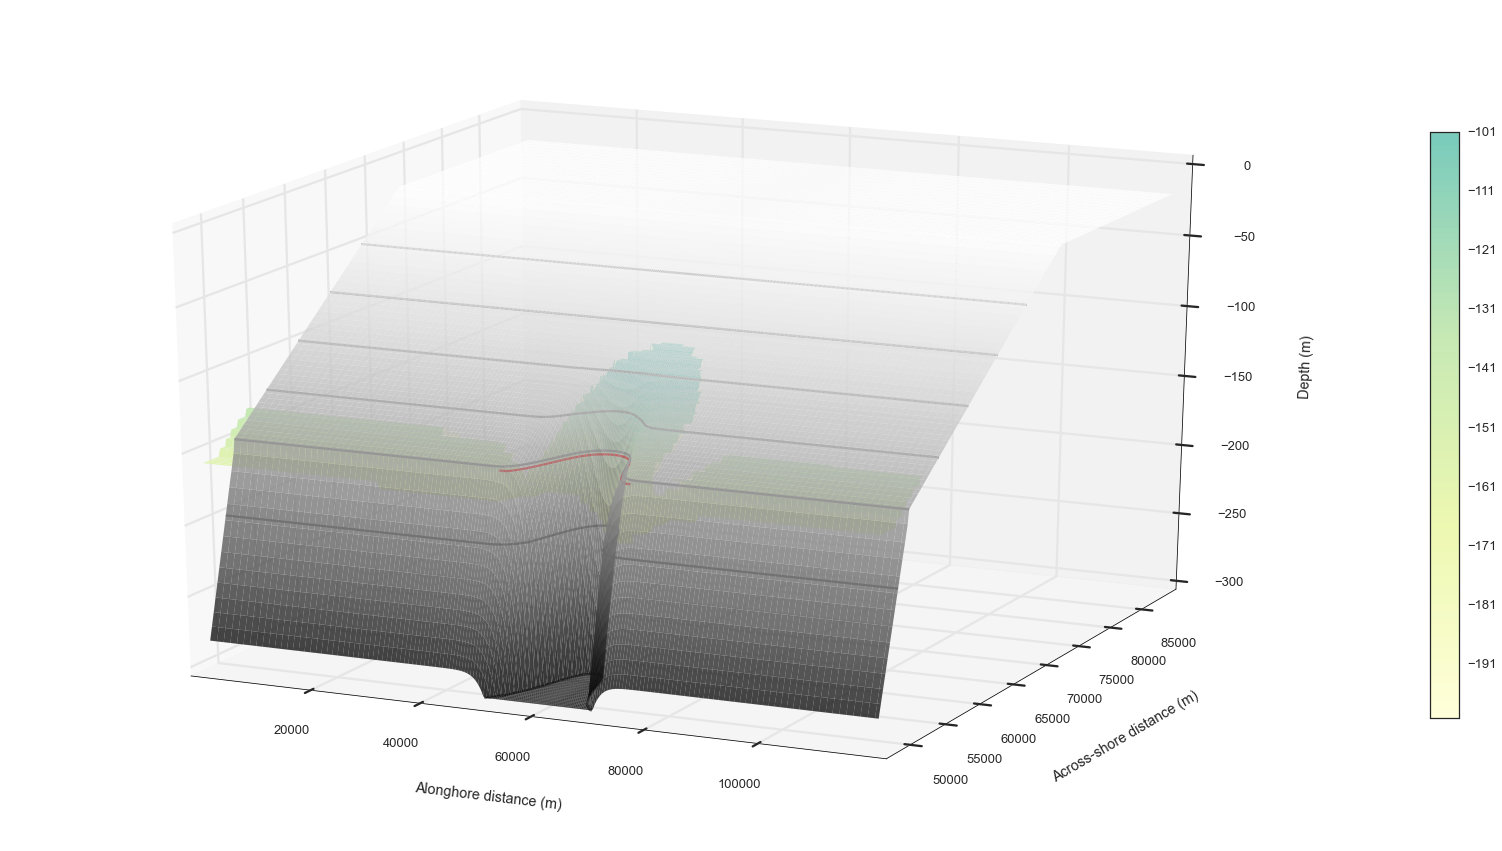

In [31]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

# Plot 3D bathymetry
bathy2 = bathy
bathy2[bathy2 > 300] = 300

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

ax1.set_zlim3d(-300, 0)

p = ax1.plot_surface(xc[200:,:],yc[200:,:],-bathy2[200:,:],cmap='Greys_r', linewidth=0.0,alpha=0.8,rstride=2,cstride=2)


lev = np.arange(-200,-100,1);
norml = mcolors.BoundaryNorm(lev, 100)

iso = ax1.plot_surface(xc[200:,:],yc[200:,:],ConcDepths[200:,:],cmap='YlGnBu',norm=norml, linewidth=0.0,alpha=1.0,rstride=2,cstride=2)
cb = fig.colorbar(iso, shrink=0.7)


cset = ax1.contour(xc[200:,:],yc[200:,:],-bathy2[200:,:],[-300,-200,-150,-125,-100,-75,-50],colors='0.50',linewidth=1, rstride=2, cstride=2,zdir='z')
cset2 = ax1.contour(xc[200:,110:250],yc[200:,110:250],-bathy2[200:,110:250],[rc[30]],colors='r',linewidth=3, rstride=2, cstride=2,zdir='z')



ax1.set_aspect('auto')

ax1.view_init(20, -65) # elevation and azimuth

ax1.set_ylabel('Across-shore distance (m)')
ax1.set_xlabel('Alonghore distance (m)')
ax1.set_zlabel('Depth (m)')


#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')